In [85]:
import pandas as pd

data = pd.read_csv("data-turbine/gt_full.csv", index_col=0)

data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
1      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
2      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
3      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
4      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
5      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36729  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36730  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36731  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36732  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36733  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  
1       0.32663   81.952  
2       0.44784   82.377  
3       0.45144   83.776  
4       0.23107   82.505  
5       0.26747   82.028  
...         ...      ...  
36729  10.99300   89.172  
36730  11.14400   88.849  
36731  11.41400   96.147  
36732   3.31340   64.738  
36733  11.98100  109.240  

[36733 rows x 11 columns]

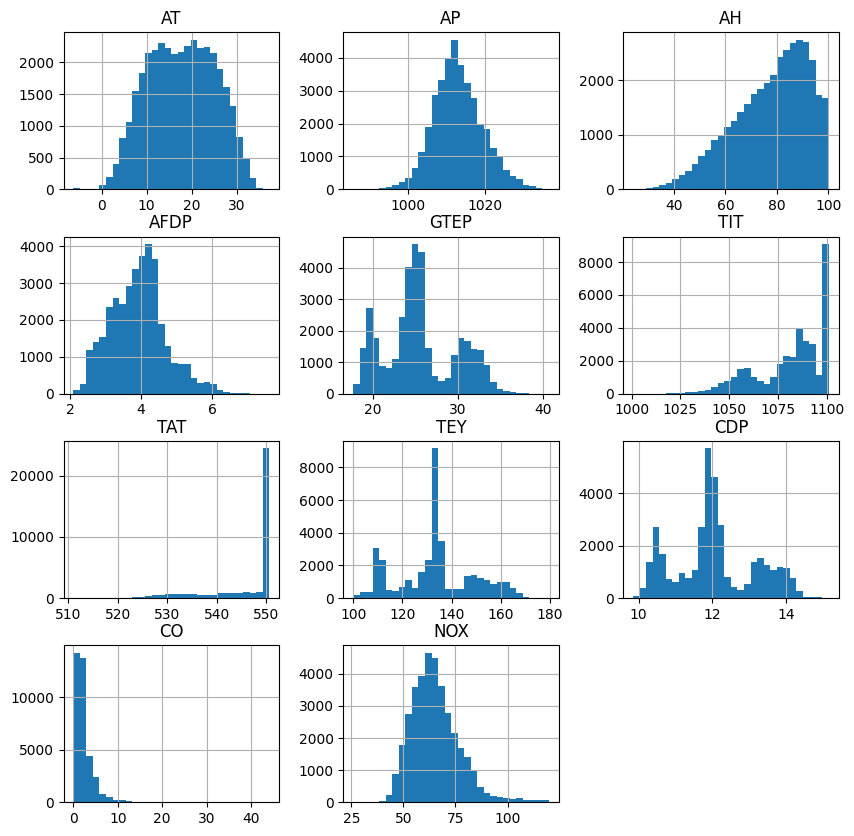

In [50]:
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(10, 10))
plt.show()

In [68]:
data.describe().transpose()

count         mean        std          min        25%        50%  \
AT    36733.0    17.712726   7.447451    -6.234800    11.7810    17.8010   
AP    36733.0  1013.070165   6.463346   985.850000  1008.8000  1012.6000   
AH    36733.0    77.867015  14.461355    24.085000    68.1880    80.4700   
AFDP  36733.0     3.925518   0.773936     2.087400     3.3556     3.9377   
GTEP  36733.0    25.563801   4.195957    17.698000    23.1290    25.1040   
TIT   36733.0  1081.428084  17.536373  1000.800000  1071.8000  1085.9000   
TAT   36733.0   546.158517   6.842360   511.040000   544.7200   549.8800   
TEY   36733.0   133.506404  15.618634   100.020000   124.4500   133.7300   
CDP   36733.0    12.060525   1.088795     9.851800    11.4350    11.9650   
CO    36733.0     2.372468   2.262672     0.000388     1.1824     1.7135   
NOX   36733.0    65.293067  11.678357    25.905000    57.1620    63.8490   

            75%        max  
AT      23.6650    37.1030  
AP    1017.0000  1036.6000  
AH      89.3760   100.2000  
AFDP     4.3769     7.6106  
GTEP    29.0610    40.7160  
TIT   1097.0000  1100.9000  
TAT    550.0400   550.6100  
TEY    144.0800   179.5000  
CDP     12.8550    15.1590  
CO       2.8429    44.1030  
NOX     71.5480   119.9100

<Axes: >

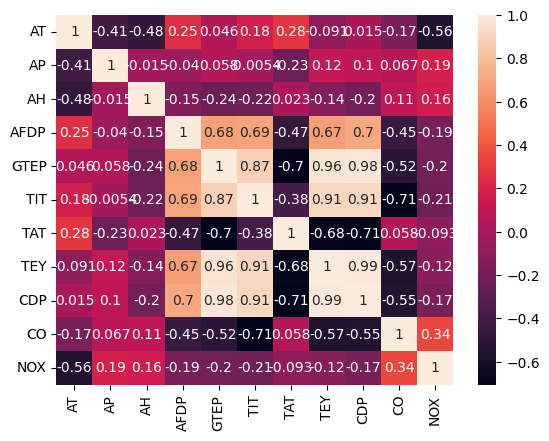

In [52]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True)

In [86]:
# data.drop(["AH", "TIT", "TAT", "TEY", "CDP", "CO"], axis=1, inplace=True)
data.drop(["AH", "GTEP", "TIT", "TAT", "CDP", "CO"], axis=1, inplace=True)
data

AT      AP    AFDP     TEY      NOX
1      4.5878  1018.7  3.5758  134.67   81.952
2      4.2932  1018.3  3.5709  134.67   82.377
3      3.9045  1018.4  3.5828  135.10   83.776
4      3.7436  1018.3  3.5808  135.03   82.505
5      3.7516  1017.8  3.5781  134.67   82.028
...       ...     ...     ...     ...      ...
36729  3.6268  1028.5  3.1661  109.08   89.172
36730  4.1674  1028.6  3.1923  108.79   88.849
36731  5.4820  1028.5  3.3128  107.81   96.147
36732  5.8837  1028.7  3.9831  131.41   64.738
36733  6.0392  1028.8  3.8752  125.41  109.240

[36733 rows x 5 columns]

<Axes: >

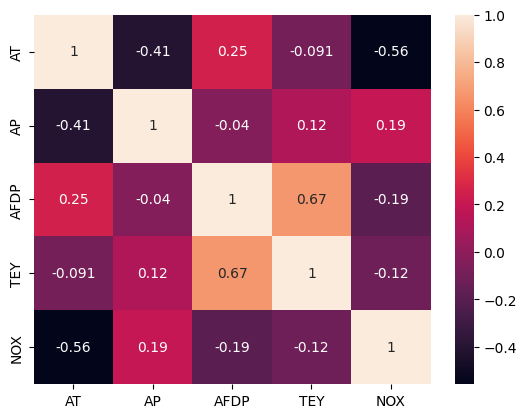

In [87]:
sns.heatmap(data.corr(), annot=True)

In [88]:
from sklearn.model_selection import train_test_split

random_state = 9

y = data["NOX"]
X = data.drop(["NOX"], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
display(X_train, y_train, X_test, y_test)

AT      AP    AFDP     TEY
4481   26.6350  1009.7  4.4137  147.37
24884  20.2280  1016.2  4.6238  154.71
21558  15.6330  1018.5  4.0899  154.26
1706   16.6540  1020.2  4.5755  132.60
21389  21.0020  1004.3  4.1101  153.48
...        ...     ...     ...     ...
25726  17.5190  1015.9  3.6809  125.22
5015   21.9780  1014.4  3.1246  110.81
22585   4.7103  1003.0  3.2741  127.67
502     6.7758  1008.3  5.1192  166.46
20829  17.6730  1020.7  3.0370  127.08

[29386 rows x 4 columns]

4481     52.970
24884    58.801
21558    78.066
1706     73.955
21389    79.989
          ...  
25726    53.424
5015     58.462
22585    65.275
502      65.469
20829    77.008
Name: NOX, Length: 29386, dtype: float64

AT      AP    AFDP     TEY
18247  23.4530  1006.2  3.7535  132.47
20344  28.7090  1011.2  6.0321  145.91
2925   21.8330  1017.0  3.9663  139.04
118     7.8167  1022.2  4.6605  164.73
5714   19.9120  1013.1  3.6710  126.90
...        ...     ...     ...     ...
21918   9.5791  1017.5  2.9617  130.74
13100  22.6150  1012.1  4.2739  133.44
26705  28.4020  1004.4  4.0643  123.17
4183   31.7400  1012.2  4.5323  148.16
2983   23.7130  1013.5  3.7112  134.75

[7347 rows x 4 columns]

18247    58.948
20344    62.909
2925     61.083
118      66.369
5714     56.675
          ...  
21918    71.316
13100    63.308
26705    49.210
4183     59.452
2983     66.807
Name: NOX, Length: 7347, dtype: float64

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, tree, neighbors, ensemble

models = {
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "ridge": {"model": linear_model.RidgeCV()},
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=random_state, n_jobs=-1
        )
    },
}

In [90]:
import math
from sklearn import metrics

for model_name in models.keys():
    print(f"Model: {model_name}")
    fitted_model = models[model_name]["model"].fit(
        X_train.values, y_train.values.ravel()
    )
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    models[model_name]["fitted"] = fitted_model
    models[model_name]["train_preds"] = y_train_pred
    models[model_name]["preds"] = y_test_pred
    models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(y_train, y_train_pred)
    )
    models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(y_test, y_test_pred)
    )
    models[model_name]["RMAE_test"] = math.sqrt(
        metrics.mean_absolute_error(y_test, y_test_pred)
    )
    models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_pred)

Model: linear
Model: linear_poly
Model: linear_interact
Model: ridge
Model: decision_tree
Model: knn
Model: random_forest


In [91]:
reg_metrics = pd.DataFrame.from_dict(models, "index")[
    ["RMSE_train", "RMSE_test", "RMAE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["RMAE_test", "R2_test"])

In [92]:
import numpy as np
from sklearn import model_selection

parameters = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth": np.arange(1, 21).tolist()[0::2],
    "min_samples_split": np.arange(2, 11).tolist()[0::2],
}

grid = model_selection.GridSearchCV(
    tree.DecisionTreeRegressor(random_state=random_state), parameters, cv=5, n_jobs=-1, scoring="r2"
)

grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 11, 'min_samples_split': 10}

In [93]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
old_metrics = {
    "RMSE_test": models["decision_tree"]["RMSE_test"],
    "RMAE_test": models["decision_tree"]["RMAE_test"],
    "R2_test": models["decision_tree"]["R2_test"],
}
new_metrics = {}
new_metrics["RMSE_test"] = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
new_metrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(y_test, y_pred)
)
new_metrics["R2_test"] = metrics.r2_score(y_test, y_pred)

display(old_metrics)
display(new_metrics)

{'RMSE_test': 6.84118617689543,
 'RMAE_test': 2.2195993811135173,
 'R2_test': 0.6653958046551318}

{'RMSE_test': 6.546479523550588,
 'RMAE_test': 2.103303254163764,
 'R2_test': 0.6936032245010844}

In [94]:
rules = tree.export_text(model, feature_names=X_train.columns.values.tolist())
print(rules)

|--- AT <= 16.96
|   |--- TEY <= 118.41
|   |   |--- AT <= 10.84
|   |   |   |--- AT <= 7.75
|   |   |   |   |--- AFDP <= 3.08
|   |   |   |   |   |--- AFDP <= 2.68
|   |   |   |   |   |   |--- AFDP <= 2.54
|   |   |   |   |   |   |   |--- AP <= 1021.35
|   |   |   |   |   |   |   |   |--- AP <= 1016.15
|   |   |   |   |   |   |   |   |   |--- AP <= 1007.80
|   |   |   |   |   |   |   |   |   |   |--- AT <= 6.31
|   |   |   |   |   |   |   |   |   |   |   |--- value: [116.50]
|   |   |   |   |   |   |   |   |   |   |--- AT >  6.31
|   |   |   |   |   |   |   |   |   |   |   |--- value: [101.82]
|   |   |   |   |   |   |   |   |   |--- AP >  1007.80
|   |   |   |   |   |   |   |   |   |   |--- AFDP <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [95.24]
|   |   |   |   |   |   |   |   |   |   |--- AFDP >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [104.93]
|   |   |   |   |   |   |   |   |--- AP >  1016.15
|   |   |   |   |   |   |   |   |   |--- AP <= 

In [95]:
import pickle

pickle.dump(model, open("data-turbine/tree-nox-gs.model.sav", "wb"))

In [96]:
rules2 = tree.export_text(
    models["decision_tree"]["fitted"], feature_names=X_train.columns.values.tolist()
)
print(rules2)

|--- AT <= 16.96
|   |--- TEY <= 118.41
|   |   |--- AT <= 10.84
|   |   |   |--- AT <= 7.75
|   |   |   |   |--- AFDP <= 3.08
|   |   |   |   |   |--- AFDP <= 2.68
|   |   |   |   |   |   |--- AFDP <= 2.54
|   |   |   |   |   |   |   |--- value: [102.29]
|   |   |   |   |   |   |--- AFDP >  2.54
|   |   |   |   |   |   |   |--- value: [93.81]
|   |   |   |   |   |--- AFDP >  2.68
|   |   |   |   |   |   |--- AP <= 1004.50
|   |   |   |   |   |   |   |--- value: [65.69]
|   |   |   |   |   |   |--- AP >  1004.50
|   |   |   |   |   |   |   |--- value: [84.70]
|   |   |   |   |--- AFDP >  3.08
|   |   |   |   |   |--- AT <= 6.44
|   |   |   |   |   |   |--- AP <= 1027.60
|   |   |   |   |   |   |   |--- value: [105.70]
|   |   |   |   |   |   |--- AP >  1027.60
|   |   |   |   |   |   |   |--- value: [94.80]
|   |   |   |   |   |--- AT >  6.44
|   |   |   |   |   |   |--- AP <= 1022.35
|   |   |   |   |   |   |   |--- value: [92.55]
|   |   |   |   |   |   |--- AP >  1022.35
|   |   |  

In [97]:
import pickle

pickle.dump(
    models["decision_tree"]["fitted"], open("data-turbine/tree-nox.model.sav", "wb")
)

In [98]:
data.to_csv("data-turbine/clear-data-nox.csv", index=False)